# THE BEST NEIGHBORHOOD IN PITTSBURGH

Vincent Zhu

## Courts and Rinks

First, we analyzed the number of courts and rinks that are in each neighborhood. Court and rinks are a great place for people to hang out and play sports which increases happiness and health. Using the data, we will find the number of population per court/rinks in each neighborhood with a lower population per court/rink meaning a higher happiness. Then we will rank the neighborhoods by the happiest neighborhood base on the scorings. 

In [4]:
# imports
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# opens the data file for court/rinks in each neighborhood
courts = pd.read_csv("CourtData.csv")
courts.head(5)

,_id,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305


Here, it will only show the important datas we need.

In [6]:
courts[['name', 'type', 'park', 'neighborhood']].head(10)

,name,type,park,neighborhood
0,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,Allegheny Center
1,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,Allegheny Center
2,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,Allegheny Center
3,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,Allegheny Center
4,Alton Park Basketball Court 1,Basketball (Half),Alton Park,Beechview
5,Alton Park Basketball Court 2,Basketball (Full),Alton Park,Beechview
6,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,Bedford Dwellings
7,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,Bedford Dwellings
8,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,South Side Slopes
9,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,South Side Flats


Now, we will print out the number of courts and rinks in each neighborhood in descending order.

In [7]:
num_courts = courts.groupby('neighborhood')['park'].count().reset_index()
num_courts.columns = ['Neighborhood', 'Total Courts']
num_courts = num_courts.sort_values(by='Total Courts', ascending=False)

print(num_courts)

           Neighborhood  Total Courts
54  Squirrel Hill South            26
27        Highland Park            20
26            Hazelwood            10
5           Beltzhoover             9
9             Brookline             9
..                  ...           ...
41          Perry South             1
7               Bon Air             1
60           Upper Hill             1
1             Allentown             1
35          Middle Hill             1

[63 rows x 2 columns]


This doesn't clearly demonstrate all the data, so we will plot a bar graph to better visualize this new data.

Text(0.5, 1.0, 'Total Courts per Neighborhood')

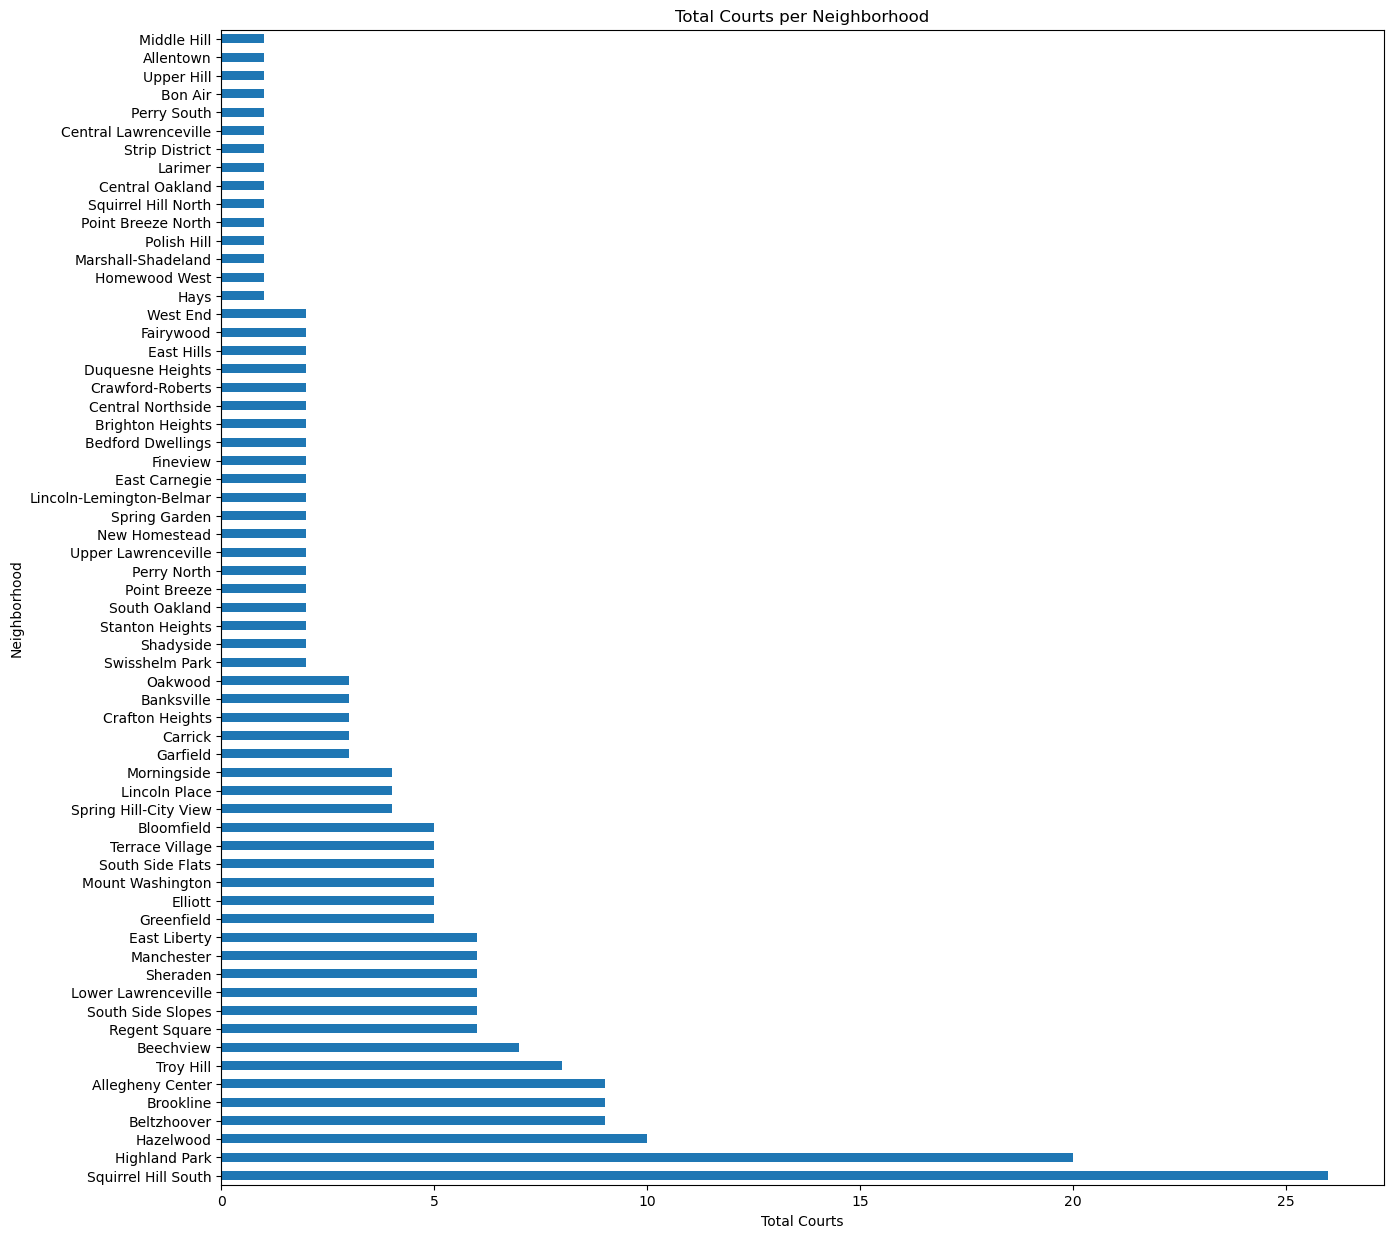

In [8]:
graph = num_courts.plot.barh(x="Neighborhood", y="Total Courts", figsize=(15,15), legend=None)
plt.xlabel('Total Courts')
plt.title('Total Courts per Neighborhood')

In [9]:
# opens the data file for estimated population in each neighborhood
population = pd.read_csv("population.csv")
population[['Neighborhood', 'Estimate; Total']].head(15)

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
5,Banksville,3858.0
6,Bedford Dwellings,1349.0
7,Beechview,8078.0
8,Beltzhoover,1702.0
9,Bloomfield,8669.0


Now, we will plot a new bar graph that shows the  population of the neighborhoods that contain courts and rinks.

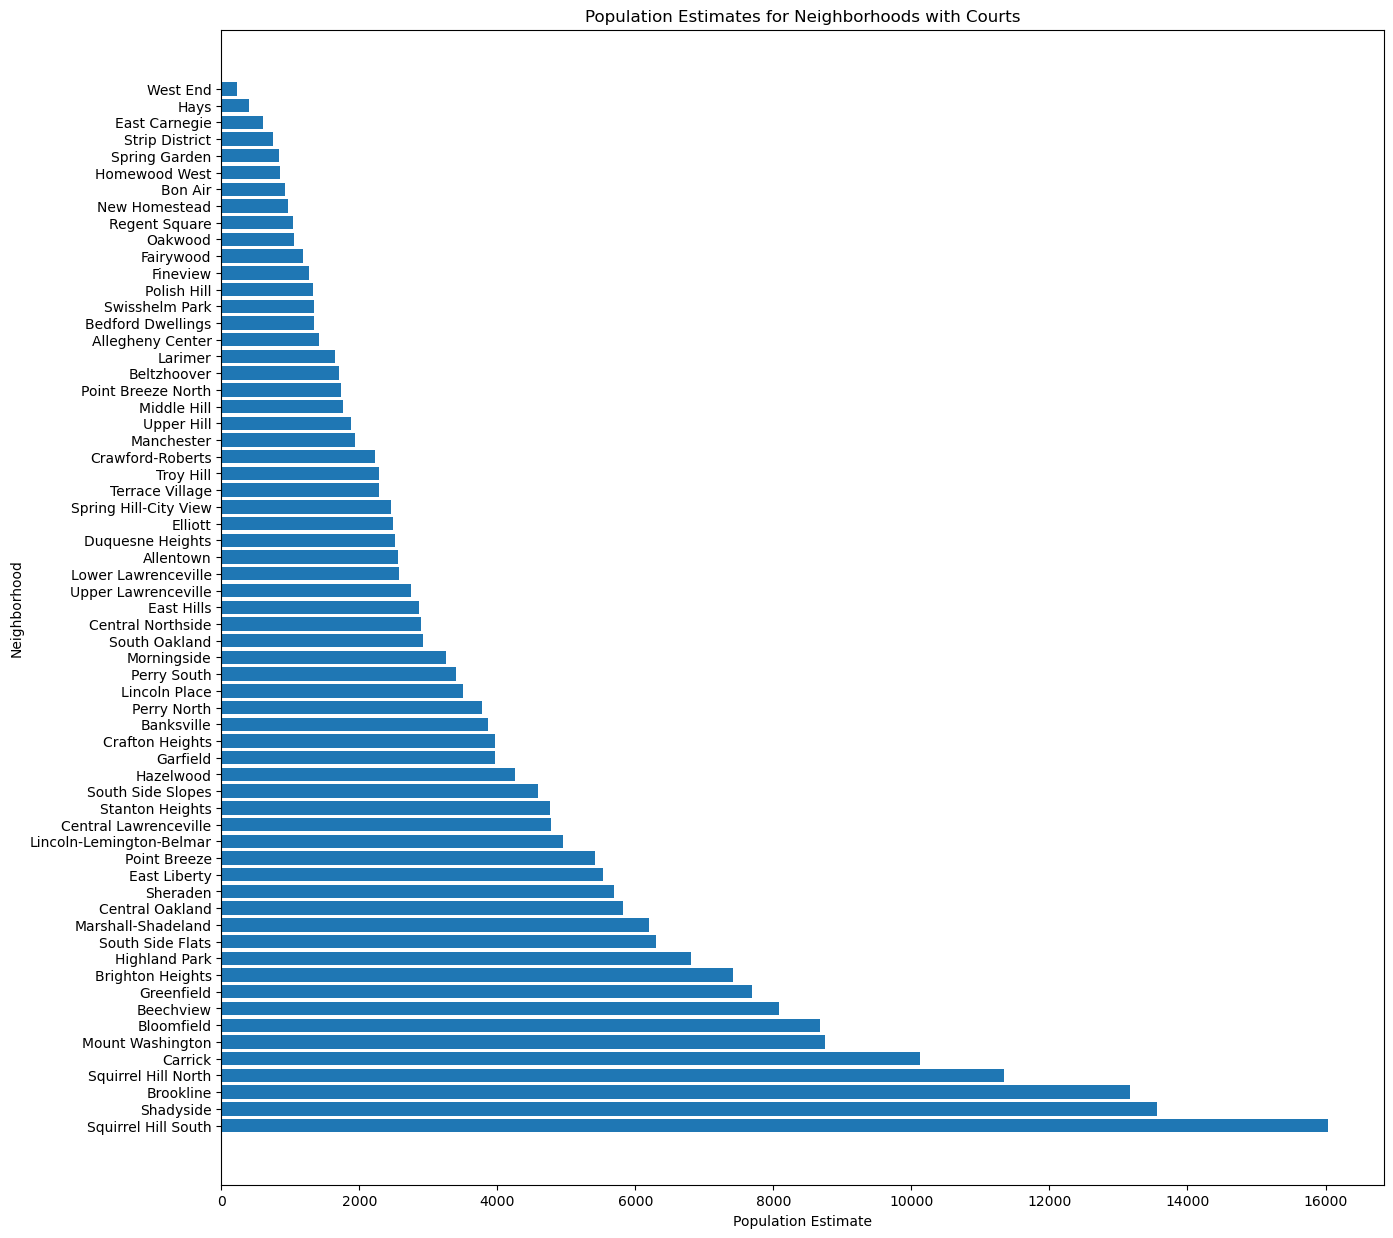

In [10]:
# filter to only show neighborhoods with courts/rinks
neighborhoods = courts['neighborhood'].unique()  
new_neighborhood = population[population['Neighborhood'].isin(neighborhoods)]
# sort in descending order
new_neighborhood = new_neighborhood.sort_values(by='Estimate; Total', ascending=False)

plt.figure(figsize=(15, 15))
# bar graph
plt.barh(new_neighborhood['Neighborhood'], new_neighborhood['Estimate; Total'])

plt.xlabel('Population Estimate')
plt.ylabel('Neighborhood')
plt.title('Population Estimates for Neighborhoods with Courts')
plt.show() 

Next, we calculate the population per court by diving the total neighborhood population by the number of courts.

In [27]:
num_courts = courts.groupby('neighborhood')['park'].count().reset_index()
num_courts.columns = ['Neighborhood', 'Total Courts']

conclusion = population.merge(num_courts, on='Neighborhood', how='inner')

# Finds the population per court by diving the total population by the number of courts 
conclusion['Population per Court'] = conclusion['Estimate; Total'] / conclusion['Total Courts']
conclusion['Population per Court'] = conclusion['Population per Court'].round(2)

# Sorts the data in ascending order 
conclusion = conclusion.sort_values(by='Population per Court', ascending=True)

print(conclusion[['Neighborhood', 'Estimate; Total', 'Total Courts', 'Population per Court']])


             Neighborhood  Estimate; Total  Total Courts  Population per Court
62               West End            235.0             2                117.50
0        Allegheny Center           1411.0             9                156.78
45          Regent Square           1033.0             6                172.17
5             Beltzhoover           1702.0             9                189.11
59              Troy Hill           2283.0             8                285.38
..                    ...              ...           ...                   ...
11  Central Lawrenceville           4775.0             1               4775.00
13        Central Oakland           5822.0             1               5822.00
34     Marshall-Shadeland           6195.0             1               6195.00
46              Shadyside          13562.0             2               6781.00
53    Squirrel Hill North          11336.0             1              11336.00

[63 rows x 4 columns]


Then, we plot another bar graph to clearly demonstrate the data of population per court.

This graph allows us to easily compare each neighborhoods' population per court. We are mainly interested in neighborhoods with lower population per court.

Text(0.5, 1.0, 'Population Per Court In Each Neighborhood')

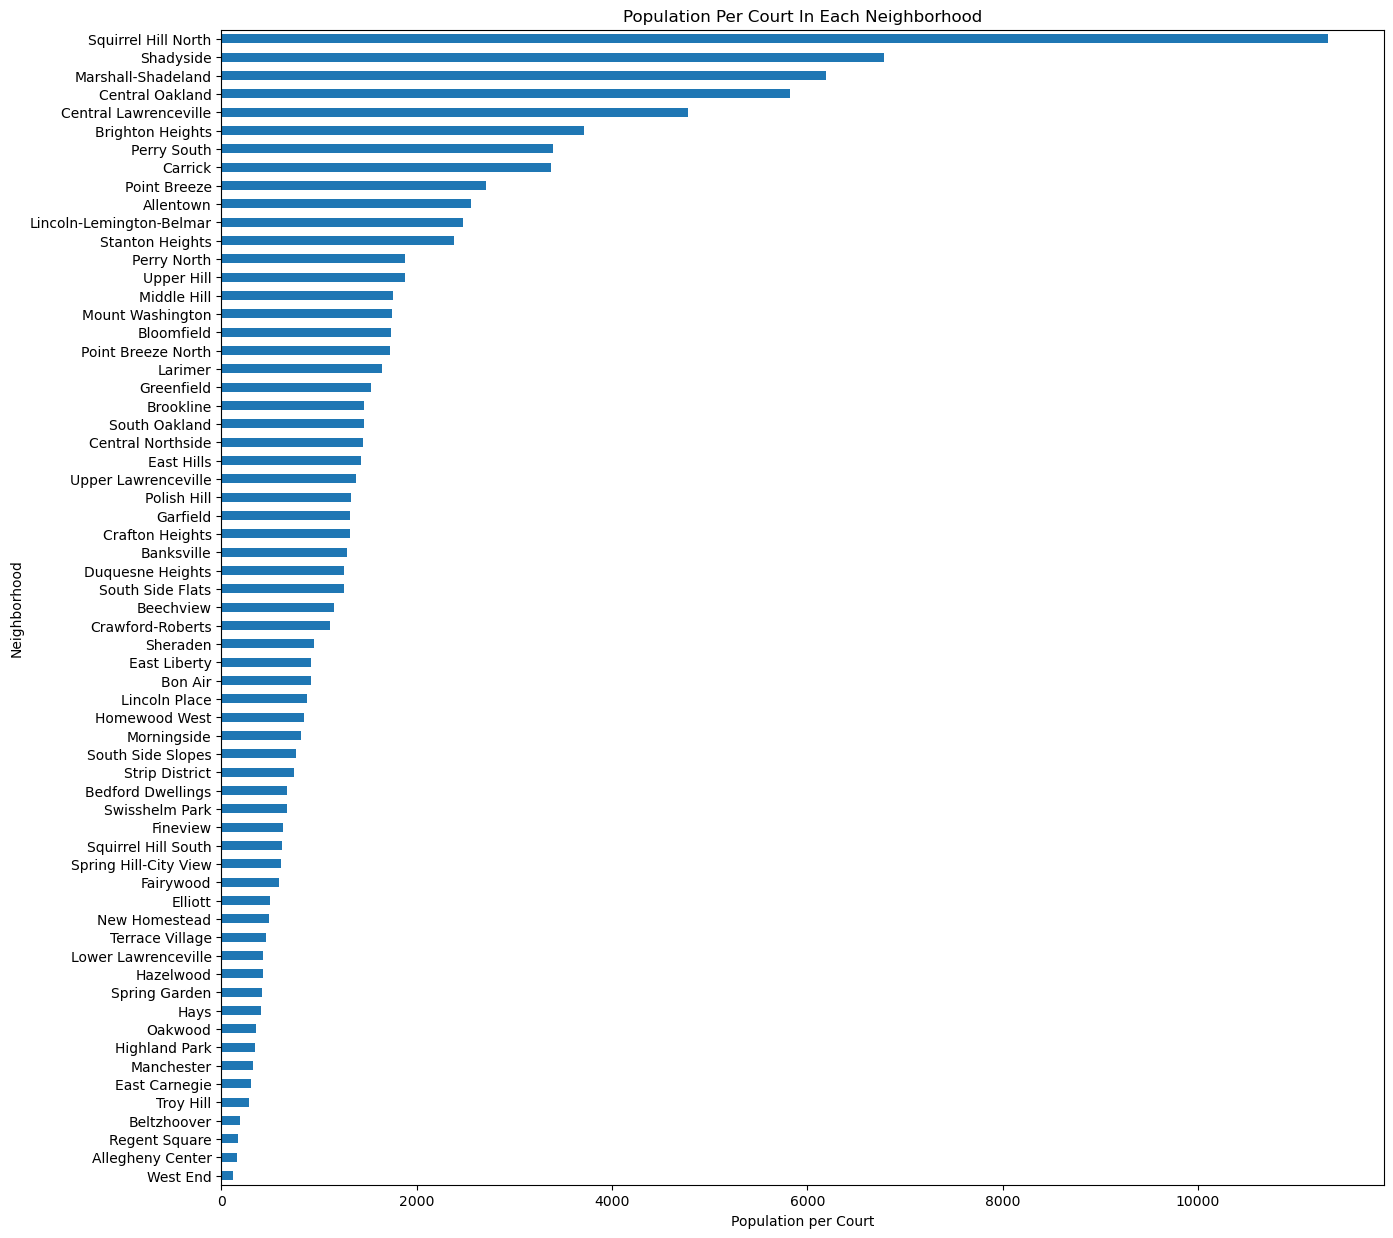

In [12]:
ppc = conclusion.plot.barh(x="Neighborhood", y="Population per Court", figsize=(15,15), legend=None)
plt.xlabel('Population per Court')
plt.title('Population Per Court In Each Neighborhood')

Now, we can break it down even more to look at the top ten neighborhoods with the lowest population per court ratio.

Text(0.5, 1.0, 'Population Per Court In Each Neighborhood')

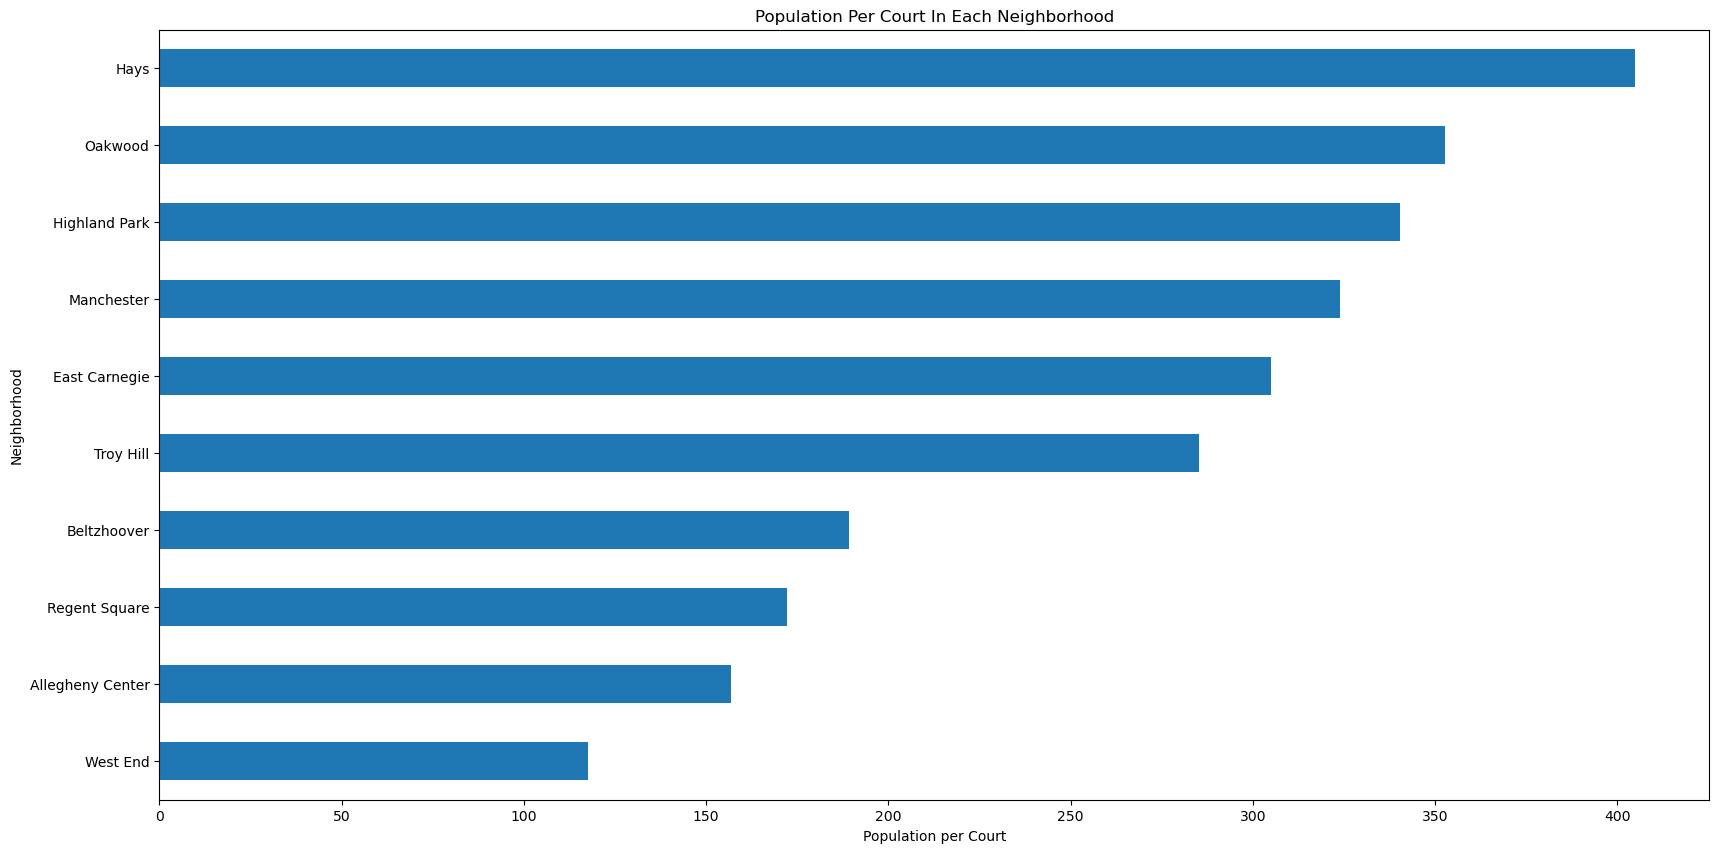

In [25]:
conclusion = conclusion.sort_values(by='Population per Court', ascending=True)
lowest = conclusion.head(10)
ppc = lowest.plot.barh(x="Neighborhood", y="Population per Court", figsize=(20,10), legend=None)
plt.xlabel('Population per Court')
plt.title('Population Per Court In Each Neighborhood')

## Conclusion

After analyzing each neighborhood based on each of their populations per court, we have decided that the best neighborhood must be one of the following neighborhoods:
* West End 
* Allegheny Center 
* Regent Square 
* Beltzhoover 
* Troy Hill
* East Carnegie
* Manchester
* Highland Park
* Oakwood
* Hays

Even though West End is has the lowest ratio, I don't believe it is the best neighborhood since it also has the lowest population. Personally, I barely know any neighborhoods in Pittsburgh, but based on the data, I would prefer Highland Park. It's among the top ten neighborhoods, and it also have the second most courts/rinks among all the neighborhoods. 